In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# Read the csv file as a pansas dataframe
data = pd.read_csv('/home/alpha/Projects/ML_internship/CodaAlpha_Diabetes_model_Prediction/Data/data.csv')

# Check some information about the data
print(f'The shape of the data is : {data.shape}')
cols = data.columns 
print(f'The columns of the data are : {cols}')
print(f'The data types of the columns are : {data.dtypes}')
print(f'The first 5 rows of the data are : {data.head()}')

The shape of the data is : (100000, 16)
The columns of the data are : Index(['year', 'gender', 'age', 'location', 'race:AfricanAmerican',
       'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other',
       'hypertension', 'heart_disease', 'smoking_history', 'bmi',
       'hbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')
The data types of the columns are : year                      int64
gender                   object
age                     float64
location                 object
race:AfricanAmerican      int64
race:Asian                int64
race:Caucasian            int64
race:Hispanic             int64
race:Other                int64
hypertension              int64
heart_disease             int64
smoking_history          object
bmi                     float64
hbA1c_level             float64
blood_glucose_level       int64
diabetes                  int64
dtype: object
The first 5 rows of the data are :    year  gender   age location  race:AfricanAmeri

In [3]:
data.isna().sum()                                        # No missing values in the data we can proceed to the next step

year                    0
gender                  0
age                     0
location                0
race:AfricanAmerican    0
race:Asian              0
race:Caucasian          0
race:Hispanic           0
race:Other              0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
hbA1c_level             0
blood_glucose_level     0
diabetes                0
dtype: int64

In [4]:
data["gender"].value_counts()                           # Check the values of the gender column

gender_dic = {"Male":1, "Female":0, "Other":0}          # Replace genders by binary values (Others are just assumed to be women since they are the majority)

pd.set_option('future.no_silent_downcasting', True)     # To stop any warnings regarding deprecation of method .replace()
data["gender"] = data["gender"].replace(gender_dic)
data["gender"].value_counts()

gender
0    58570
1    41430
Name: count, dtype: int64

In [5]:
data["location"].value_counts()

location_dummies = pd.get_dummies(data['location'], prefix='location', dtype=float)
data_with_dummies = pd.concat([data, location_dummies], axis=1)

for col in location_dummies.columns:
    correlation = data_with_dummies['diabetes'].corr(data_with_dummies[col])
    print(f'Correlation between diabetes and region {col} : {correlation}')
    
# The correlation between diabetes and location is very low, so we can drop the location column

data.drop('location', axis=1, inplace=True)             # Drop the location column
cols = data.columns
print(data.columns)

Correlation between diabetes and region location_Alabama : 0.0004925604965439763
Correlation between diabetes and region location_Alaska : 6.348956048083196e-06
Correlation between diabetes and region location_Arizona : -0.0074043948426566406
Correlation between diabetes and region location_Arkansas : -3.680623881114177e-05
Correlation between diabetes and region location_California : -0.002007230951792737
Correlation between diabetes and region location_Colorado : -0.0025332334631758403
Correlation between diabetes and region location_Connecticut : 0.001784056649504826
Correlation between diabetes and region location_Delaware : 0.006839989575718939
Correlation between diabetes and region location_District of Columbia : 0.0012542519860449912
Correlation between diabetes and region location_Florida : 0.0007247021503850797
Correlation between diabetes and region location_Georgia : -0.00026913099295703297
Correlation between diabetes and region location_Guam : 0.0025184065229548257
Correl

In [6]:
print("Corellation between features and target")        # Check the correlation between the features and the target
for col in cols:
    if data[col].dtype == 'float64' or data[col].dtype == 'int64':
        print(f'The correlation between {col} and the target is : {data[col].corr(data["diabetes"])}')

Corellation between features and target
The correlation between year and the target is : -0.0034643833616477804
The correlation between age and the target is : 0.2580080333560962
The correlation between race:AfricanAmerican and the target is : 0.004378376334014242
The correlation between race:Asian and the target is : 0.003739334045526939
The correlation between race:Caucasian and the target is : -0.0017485458342651583
The correlation between race:Hispanic and the target is : -0.0013007810735853652
The correlation between race:Other and the target is : -0.0050946451724874
The correlation between hypertension and the target is : 0.19782324640804896
The correlation between heart_disease and the target is : 0.1717268495488499
The correlation between bmi and the target is : 0.2143574057995105
The correlation between hbA1c_level and the target is : 0.4006603146474882
The correlation between blood_glucose_level and the target is : 0.41955799602055455
The correlation between diabetes and the 

In [7]:
# another observation is the low correlation between the year and the tagrgt, so we can drop the year column
data.drop('year', axis=1, inplace=True)
cols = data.columns         # Update the columns
data.head()

,gender,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,0,32.0,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,0,29.0,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,1,18.0,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,1,41.0,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,0,52.0,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [8]:
# Next step is dealing with the smoking column
data["smoking_history"].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [9]:
smoking_dic = {
    'smoking_history': ['No Info', 'never', 'former', 'current', 'not current', 'ever'],
}

pd.set_option('future.no_silent_downcasting', True)     # To stop any warnings regarding deprecation of method .replace()
data["smoking_history"] = data["smoking_history"].replace(smoking_dic)

# We hot encode the smoking column
smoking_dummies = pd.get_dummies(data['smoking_history'], prefix='smoking_history', dtype=float)
data_with_dummies = pd.concat([data, smoking_dummies], axis=1)
data_with_dummies.head()

,gender,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,32.0,0,0,0,0,1,0,0,never,27.32,5.0,100,0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,29.0,0,1,0,0,0,0,0,never,19.95,5.0,90,0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,18.0,0,0,0,0,1,0,0,never,23.76,4.8,160,0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,41.0,0,0,1,0,0,0,0,never,27.32,4.0,159,0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,52.0,1,0,0,0,0,0,0,never,23.75,6.5,90,0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
data_with_dummies.drop('smoking_history', axis=1, inplace=True)     # Drop the smoking column

In [11]:
data_with_dummies["diabetes"] = data_with_dummies.pop("diabetes")                  # Move the target column to the end of the dataframe

In [12]:
data = data_with_dummies

In [13]:
data.head()

,gender,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,diabetes
0,0,32.0,0,0,0,0,1,0,0,27.32,5.0,100,0.0,0.0,0.0,0.0,1.0,0.0,0
1,0,29.0,0,1,0,0,0,0,0,19.95,5.0,90,0.0,0.0,0.0,0.0,1.0,0.0,0
2,1,18.0,0,0,0,0,1,0,0,23.76,4.8,160,0.0,0.0,0.0,0.0,1.0,0.0,0
3,1,41.0,0,0,1,0,0,0,0,27.32,4.0,159,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0,52.0,1,0,0,0,0,0,0,23.75,6.5,90,0.0,0.0,0.0,0.0,1.0,0.0,0


In [14]:
# Now we normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

def clean_feature_names(df):
    df.columns = [re.sub(r'[^a-zA-Z0-9_]', '_', col) for col in df.columns]
    return df


df = clean_feature_names(data_scaled)
data_scaled.head()

,gender,age,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,smoking_history_No_Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not_current,diabetes
0,0.0,0.399399,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.202031,0.272727,0.090909,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.361862,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.116013,0.272727,0.045455,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.224224,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.160481,0.236364,0.363636,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.512012,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.202031,0.090909,0.359091,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.649650,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.160364,0.545455,0.045455,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_scaled.drop('diabetes', axis=1), data_scaled['diabetes'], test_size=0.2, random_state=0)

In [16]:
# Create and fit the models
model1 = RandomForestClassifier(n_estimators=1000, random_state=42)
model1.fit(X_train, y_train)

model2 = LogisticRegression(random_state=42)
model2.fit(X_train, y_train)

model3 = SVC(random_state=42)
model3.fit(X_train, y_train)

model4 = KNeighborsClassifier()
model4.fit(X_train, y_train)

model5 = GradientBoostingClassifier(n_estimators=100, random_state=42)
model5.fit(X_train, y_train)

model6 = xgb.XGBClassifier(n_estimators=100, random_state=42)
model6.fit(X_train, y_train)

model7 = lgb.LGBMClassifier(n_estimators=100, random_state=42)
model7.fit(X_train, y_train)

model8 = GaussianNB()
model8.fit(X_train, y_train)

model9 = MLPClassifier(random_state=42)
model9.fit(X_train, y_train)

model10 = AdaBoostClassifier(n_estimators=100, random_state=42)
model10.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 6794, number of negative: 73206
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000809 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 421
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.084925 -> initscore=-2.377238
[LightGBM] [Info] Start training from score -2.377238


/home/alpha/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100, random_state=42)

In [17]:
models = [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10]
accuracy = [accuracy_score(y_test, model.predict(X_test)) for model in models]


# Create a dictionary of model names and their accuracies
accuracies = {
    'RandomForest': accuracy[0],
    'LogisticRegression': accuracy[1],
    'SVM': accuracy[2],
    'KNN': accuracy[3],
    'GradientBoosting': accuracy[4],
    'XGBoost': accuracy[5],
    'LightGBM': accuracy[6],
    'NaiveBayes': accuracy[7],
    'NeuralNetwork': accuracy[8],
    'AdaBoost': accuracy[9]
}

In [18]:
results_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])          # Convert to a dataframe

In [19]:
results_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])
results_table = results_df.sort_values(by='Accuracy', ascending=False)
print(results_table)

                Model  Accuracy
4    GradientBoosting   0.97230
0        RandomForest   0.97200
6            LightGBM   0.97190
9            AdaBoost   0.97185
8       NeuralNetwork   0.97160
5             XGBoost   0.97090
2                 SVM   0.96140
1  LogisticRegression   0.96105
3                 KNN   0.95495
7          NaiveBayes   0.90130


/tmp/ipykernel_208412/3946663133.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')


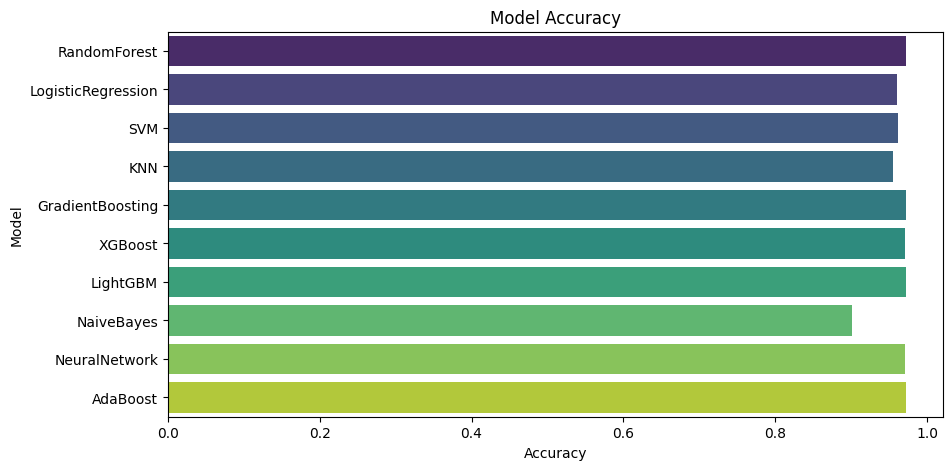

In [20]:
# plot the results
plt.figure(figsize=(10, 5))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Model Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()